<a href="https://colab.research.google.com/github/Myavuzars/Image-Classifications-w-TensorFlow/blob/main/Bean_Image_Classifications_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/MyDrive/Colab Notebooks/Tensorflow Datasets/BEAN.zip" -d "/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets"




In [ ]:
train_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/train'
valid_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/validation'
test_dir = '/content/drive/My Drive/Colab Notebooks/Tensorflow Datasets/BEAN/test'


In [ ]:
path = os.listdir( test_dir )
image_count = len(os.listdir(test_dir))
print(image_count)

3


In [ ]:
for file in path:
  print (file)

angular_leaf_spot
bean_rust
healthy


In [ ]:
train_im_gen = ImageDataGenerator(rescale= 1./255,
                                   zoom_range= 0.2,
                                   width_shift_range= 0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split= 0.0)

validation_im_gen = ImageDataGenerator(rescale=1./255)

test_im_gen = ImageDataGenerator(rescale= 1./255 )



In [ ]:
train_datagen= train_im_gen.flow_from_directory(train_dir,
                                             target_size= (300,300),
                                             batch_size=32,
                                             shuffle=True,
                                             class_mode='sparse' )

valid_datagen= validation_im_gen.flow_from_directory(valid_dir ,
                                             batch_size =32,
                                             class_mode='sparse',
                                             target_size= (300,300))
test_datagen = test_im_gen.flow_from_directory(test_dir,
                                               batch_size=32
                                               )

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [ ]:
training_images, _ = next(train_datagen) 

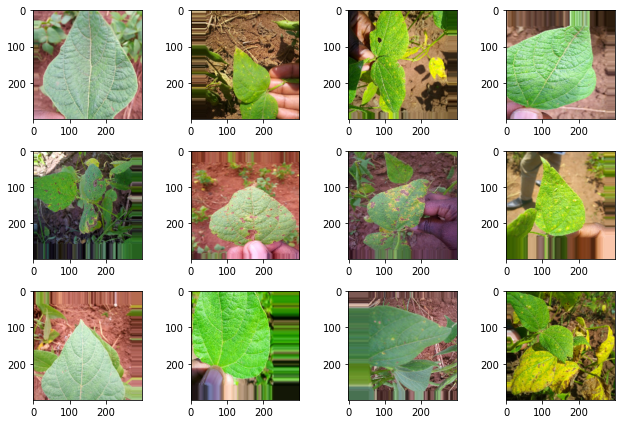

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(3, 4, figsize=(9,6))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plotImages(training_images[:12])  # Plot 12 images



In [ ]:
# Build the Model

model= tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same', input_shape=(300,300,3), activation ='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            
                            tf.keras.layers.Conv2D(128,(3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Conv2D(512, (3,3),padding='same', activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),

                            tf.keras.layers.Dropout(0.4),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dense(3, activation='softmax')

                            ])

In [ ]:
#Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Note that SPARSE CATEGORICAL works with integer categoricalvariable, if you do not specify Softmax, then we should add (from_logits=True)

In [ ]:
EPOCHS=10
#Fit the model
history = model.fit(train_datagen, 
          epochs= EPOCHS,
          validation_data = valid_datagen)

Epoch 1/10
33/33 [==============================] - 587s 18s/step - loss: 6.9922 - accuracy: 0.3484 - val_loss: 1.0237 - val_accuracy: 0.4361
Epoch 2/10
33/33 [==============================] - 27s 811ms/step - loss: 0.9887 - accuracy: 0.4826 - val_loss: 0.8625 - val_accuracy: 0.5038
Epoch 3/10
33/33 [==============================] - 27s 820ms/step - loss: 0.9117 - accuracy: 0.5757 - val_loss: 0.8088 - val_accuracy: 0.6165
Epoch 4/10
33/33 [==============================] - 26s 798ms/step - loss: 0.8426 - accuracy: 0.6053 - val_loss: 0.6598 - val_accuracy: 0.7143
Epoch 5/10
33/33 [==============================] - 26s 794ms/step - loss: 0.7051 - accuracy: 0.6983 - val_loss: 0.6322 - val_accuracy: 0.6767
Epoch 6/10
33/33 [==============================] - 26s 772ms/step - loss: 0.7231 - accuracy: 0.6753 - val_loss: 0.5385 - val_accuracy: 0.7744
Epoch 7/10
33/33 [==============================] - 25s 769ms/step - loss: 0.6540 - accuracy: 0.7197 - val_loss: 0.5093 - val_accuracy: 0.7293


In [ ]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range= range(EPOCHS)

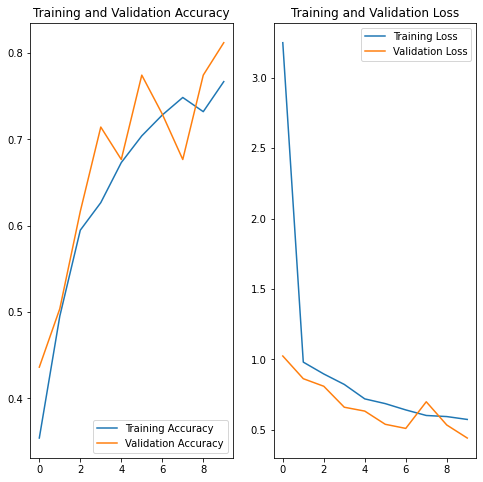

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


In [ ]:
#Evaluate Accuracy
test_loss, test_accuracy  = model.evaluate(test_datagen, steps = math.ceil(num_test_examples/batch_size))

print('Accuracy on test dataset:', test_accuracy)